In [1]:
from datasets import load_from_disk

In [3]:
# Load dataset from disk
dataset = load_from_disk("/root/FineTunnedStableDiffusion/img/loredana_dataset")

In [4]:
#Inspect dataset schema and first few samples
schema = dataset.features
sample = dataset[0]
schema, sample

({'image': Image(mode=None, decode=True, id=None),
  'text': Value(dtype='string', id=None)},
 {'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
  'text': 'Loredana Gaspar in a light checkered blazer, looking confidently forward'})

In [18]:
from torchvision import transforms
from transformers import CLIPTokenizer
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

In [6]:
#1Load the tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")
#2 Define the image transformation
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize([0.5],[0.5]) # Normalize
])

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

In [8]:
#Original image and text
original_image = dataset[0]['image']
original_text = dataset[0]['text']

original_image, original_text

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'Loredana Gaspar in a light checkered blazer, looking confidently forward')

In [ ]:
# Text tokenization
tokenized=tokenizer(original_text, padding="max_length", truncation=True, max_length=77, return_tensors="pt")

#Image preprocessing

tensor_image = transforms.ToTensor()(original_image)
normalized_image = transform(original_image) # Original RGB =[1.0 , 0.502, 0.0]= > RGB = [1.0, 0.502, 0.0] when converting to tensor to float [0,1] => [1.0 , 0.004, -1.0] when normalizing to [-1, 1]

# Display output summary
{
    "original_text": original_text,
    "tokenized_ids": tokenized.input_ids[0].tolist(),
    "tensor_image_shape_before_norm": tensor_image.shape,
    "tensor_image_minmax_before_norm": (tensor_image.min().item(), tensor_image.max().item()),
    "normalized_image_shape": normalized_image.shape,
    "normalized_image_minmax": (normalized_image.min().item(), normalized_image.max().item()),
    "token_count": tokenized.input_ids.shape[-1]
}

{'original_text': 'Loredana Gaspar in a light checkered blazer, looking confidently forward',
 'tokenized_ids': [49406,
  549,
  1893,
  1388,
  5047,
  9163,
  530,
  320,
  1395,
  1113,
  26690,
  17606,
  267,
  1312,
  5005,
  28817,
  2342,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407,
  49407],
 'tensor_image_shape_before_norm': torch.Size([3, 512, 512]),
 'tensor_image_minmax_before_norm': (0.0, 1.0),
 'normalized_image_shape': torch.Size([3, 512, 512]),
 'normalized_image_minmax': (-1.0, 1.0),
 'token

In [15]:
tensor_image, tensor_image.shape

(tensor([[[0.8706, 0.8745, 0.8706,  ..., 0.8392, 0.8392, 0.8510],
          [0.8706, 0.8745, 0.8784,  ..., 0.8431, 0.8431, 0.8471],
          [0.8784, 0.8745, 0.8667,  ..., 0.8392, 0.8431, 0.8431],
          ...,
          [0.8078, 0.8039, 0.8078,  ..., 0.5059, 0.5333, 0.4510],
          [0.8157, 0.8039, 0.8078,  ..., 0.7176, 0.7255, 0.6510],
          [0.8118, 0.8039, 0.8039,  ..., 0.8706, 0.8902, 0.8353]],
 
         [[0.9098, 0.9137, 0.9098,  ..., 0.8824, 0.8824, 0.8941],
          [0.9098, 0.9137, 0.9176,  ..., 0.8824, 0.8824, 0.8863],
          [0.9176, 0.9137, 0.9059,  ..., 0.8824, 0.8863, 0.8863],
          ...,
          [0.8431, 0.8392, 0.8431,  ..., 0.6627, 0.6902, 0.6196],
          [0.8510, 0.8392, 0.8431,  ..., 0.8275, 0.8392, 0.7725],
          [0.8471, 0.8392, 0.8392,  ..., 0.9333, 0.9412, 0.8941]],
 
         [[0.8784, 0.8824, 0.8784,  ..., 0.8588, 0.8588, 0.8706],
          [0.8784, 0.8824, 0.8863,  ..., 0.8745, 0.8745, 0.8784],
          [0.8863, 0.8824, 0.8745,  ...,

In [14]:
normalized_image, normalized_image.shape

(tensor([[[ 0.7412,  0.7490,  0.7412,  ...,  0.6784,  0.6784,  0.7020],
          [ 0.7412,  0.7490,  0.7569,  ...,  0.6863,  0.6863,  0.6941],
          [ 0.7569,  0.7490,  0.7333,  ...,  0.6784,  0.6863,  0.6863],
          ...,
          [ 0.6157,  0.6078,  0.6157,  ...,  0.0118,  0.0667, -0.0980],
          [ 0.6314,  0.6078,  0.6157,  ...,  0.4353,  0.4510,  0.3020],
          [ 0.6235,  0.6078,  0.6078,  ...,  0.7412,  0.7804,  0.6706]],
 
         [[ 0.8196,  0.8275,  0.8196,  ...,  0.7647,  0.7647,  0.7882],
          [ 0.8196,  0.8275,  0.8353,  ...,  0.7647,  0.7647,  0.7725],
          [ 0.8353,  0.8275,  0.8118,  ...,  0.7647,  0.7725,  0.7725],
          ...,
          [ 0.6863,  0.6784,  0.6863,  ...,  0.3255,  0.3804,  0.2392],
          [ 0.7020,  0.6784,  0.6863,  ...,  0.6549,  0.6784,  0.5451],
          [ 0.6941,  0.6784,  0.6784,  ...,  0.8667,  0.8824,  0.7882]],
 
         [[ 0.7569,  0.7647,  0.7569,  ...,  0.7176,  0.7176,  0.7412],
          [ 0.7569,  0.7647,

In [19]:
class LoraDataset(Dataset):
    def __init__(self, hf_dataset, tokenizer):
        self.dataset = hf_dataset
        self.tokenizer = tokenizer
        self.image_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
        ])
    
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.image_transform(self.dataset[idx]["image"])
        caption = self.dataset[idx]["text"]
        tokenized = self.tokenizer(caption, truncation=True, padding="max_length", max_length=77, return_tensors="pt")
        return image, tokenized.input_ids.squeeze(0)


In [22]:
# --- 4. Split Dataset into Train and Test ---
split_dataset = dataset.train_test_split(test_size=3, seed=42)
train_dataset = split_dataset['train']
test_dataset = split_dataset['test']

In [23]:
# --- 5. Instantiate Dataset and DataLoader ---
train_data = LoraDataset(train_dataset, tokenizer)
test_data = LoraDataset(test_dataset, tokenizer)
trainloader = DataLoader(train_data, batch_size=4, shuffle=True)
testloader = DataLoader(test_data, batch_size=4, shuffle=False) 

In [24]:
# --- 6. Inspect Sample Output ---
# View image tensor stats and tokenized text
sample_image, sample_input_ids = train_data[0]
print("Image tensor shape:", sample_image.shape)
print("Image tensor range:", sample_image.min().item(), "to", sample_image.max().item())
print("Tokenized text (input_ids):", sample_input_ids.tolist())

Image tensor shape: torch.Size([3, 512, 512])
Image tensor range: -1.0 to 1.0
Tokenized text (input_ids): [49406, 549, 1893, 1388, 5047, 9163, 530, 4774, 21222, 267, 16536, 5853, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407]


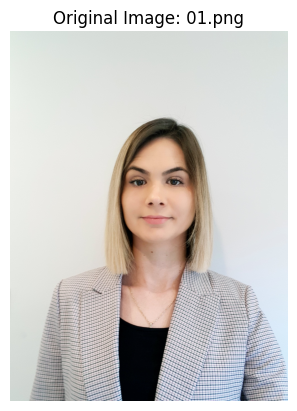

Image mode: RGB
Image size: (2448, 3264)


In [26]:
from PIL import Image
# --- 8. Inspect External Image ---
image_path = "/root/FineTunnedStableDiffusion/img/processed_images/01.png"
original_image = Image.open(image_path).convert("RGB")

# Display image and basic info
plt.imshow(original_image)
plt.title("Original Image: 01.png")
plt.axis("off")
plt.show()

print("Image mode:", original_image.mode)
print("Image size:", original_image.size)

In [28]:
import os
# --- 9. Resize and Save All Images to 1024x1024 ---
input_dir = "/root/FineTunnedStableDiffusion/img/processed_images"
output_dir = "/root/FineTunnedStableDiffusion/img/resized_1024"
os.makedirs(output_dir, exist_ok=True)

resize_transform = transforms.Resize((1024, 1024))

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path).convert("RGB")
        resized_img = resize_transform(img)
        resized_img.save(os.path.join(output_dir, filename))

print(f"Resized and saved all images to: {output_dir}")

Resized and saved all images to: /root/FineTunnedStableDiffusion/img/resized_1024


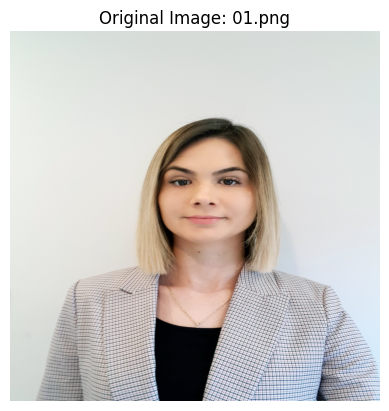

Image mode: RGB
Image size: (1024, 1024)


In [32]:
image_path = "/root/FineTunnedStableDiffusion/img/resized_1024/01.png"
original_image = Image.open(image_path).convert("RGB")

# Display image and basic info
plt.imshow(original_image)
plt.title("Original Image: 01.png")
plt.axis("off")
plt.show()

print("Image mode:", original_image.mode)
print("Image size:", original_image.size)

In [ ]:
# --- 10. Create Dataset from Resized Images and Captions ---
image_dir = "/root/FineTunnedStableDiffusion/img/resized_1024"
caption_file = "/root/FineTunnedStableDiffusion/img/captions"
data_out_path = "/root/FineTunnedStableDiffusion/data"
os.makedirs(data_out_path, exist_ok=True)


image_files = sorted([file for file in os.listdir(image_dir) if file.endswith(('.png', '.jpg', '.jpeg'))])

image_paths=[]
captiions=[]

assert len(image_files) == len(captions), "Mismatch between number of images and captions."

image_paths = [os.path.join(image_dir, file) for file in image_files]

hf_dataset = Dataset.from_dict({
    "image": image_paths,
    "text": captions
}).cast_column("image", datasets.Image())

hf_dataset.save_to_disk(data_out_path)
print(f"Saved paired dataset to: {data_out_path}")

IsADirectoryError: [Errno 21] Is a directory: '/root/FineTunnedStableDiffusion/img/captions'